Model loaded from ../models/model_set_60.pth


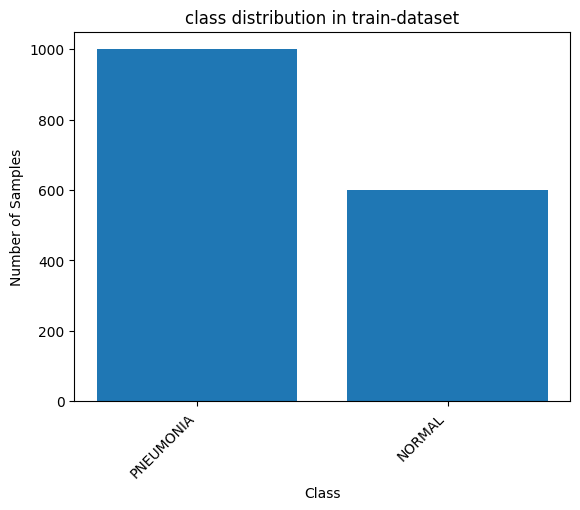

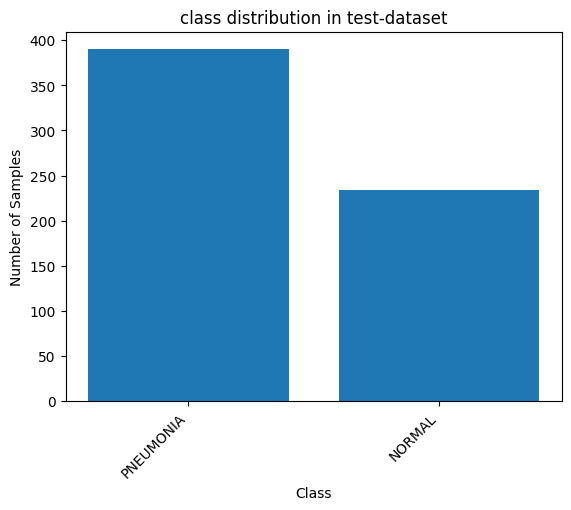

In [1]:
import numpy as np

from plot_utils import plot_histogram_balance_of_dataset, plot_roc_curve, plot_probability_histogram
from model import Model
from plot_utils import plot_pr_curve
from numpy import argmax
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import numpy as np

train_data_dir = "../data/train_data_chest_xray_set_60"
test_data_dir = "../data/chest_xray/test"
train_val_split_ratio = 0.8

model = Model(train_dir=train_data_dir,
              test_dir=test_data_dir,
              train_val_split_ratio=train_val_split_ratio)
model.load_existing_model("../models/model_set_60.pth")
plot_histogram_balance_of_dataset(train_data_dir, "class distribution in train-dataset")
plot_histogram_balance_of_dataset(test_data_dir, "class distribution in test-dataset")

In [2]:
true_labels_val, predicted_labels_val, confidence_all_classes_val, _ = model.evaluate(model.val_loader)
true_labels, predicted_labels_baseline, confidence_baseline, _ = model.evaluate()

## Baseline


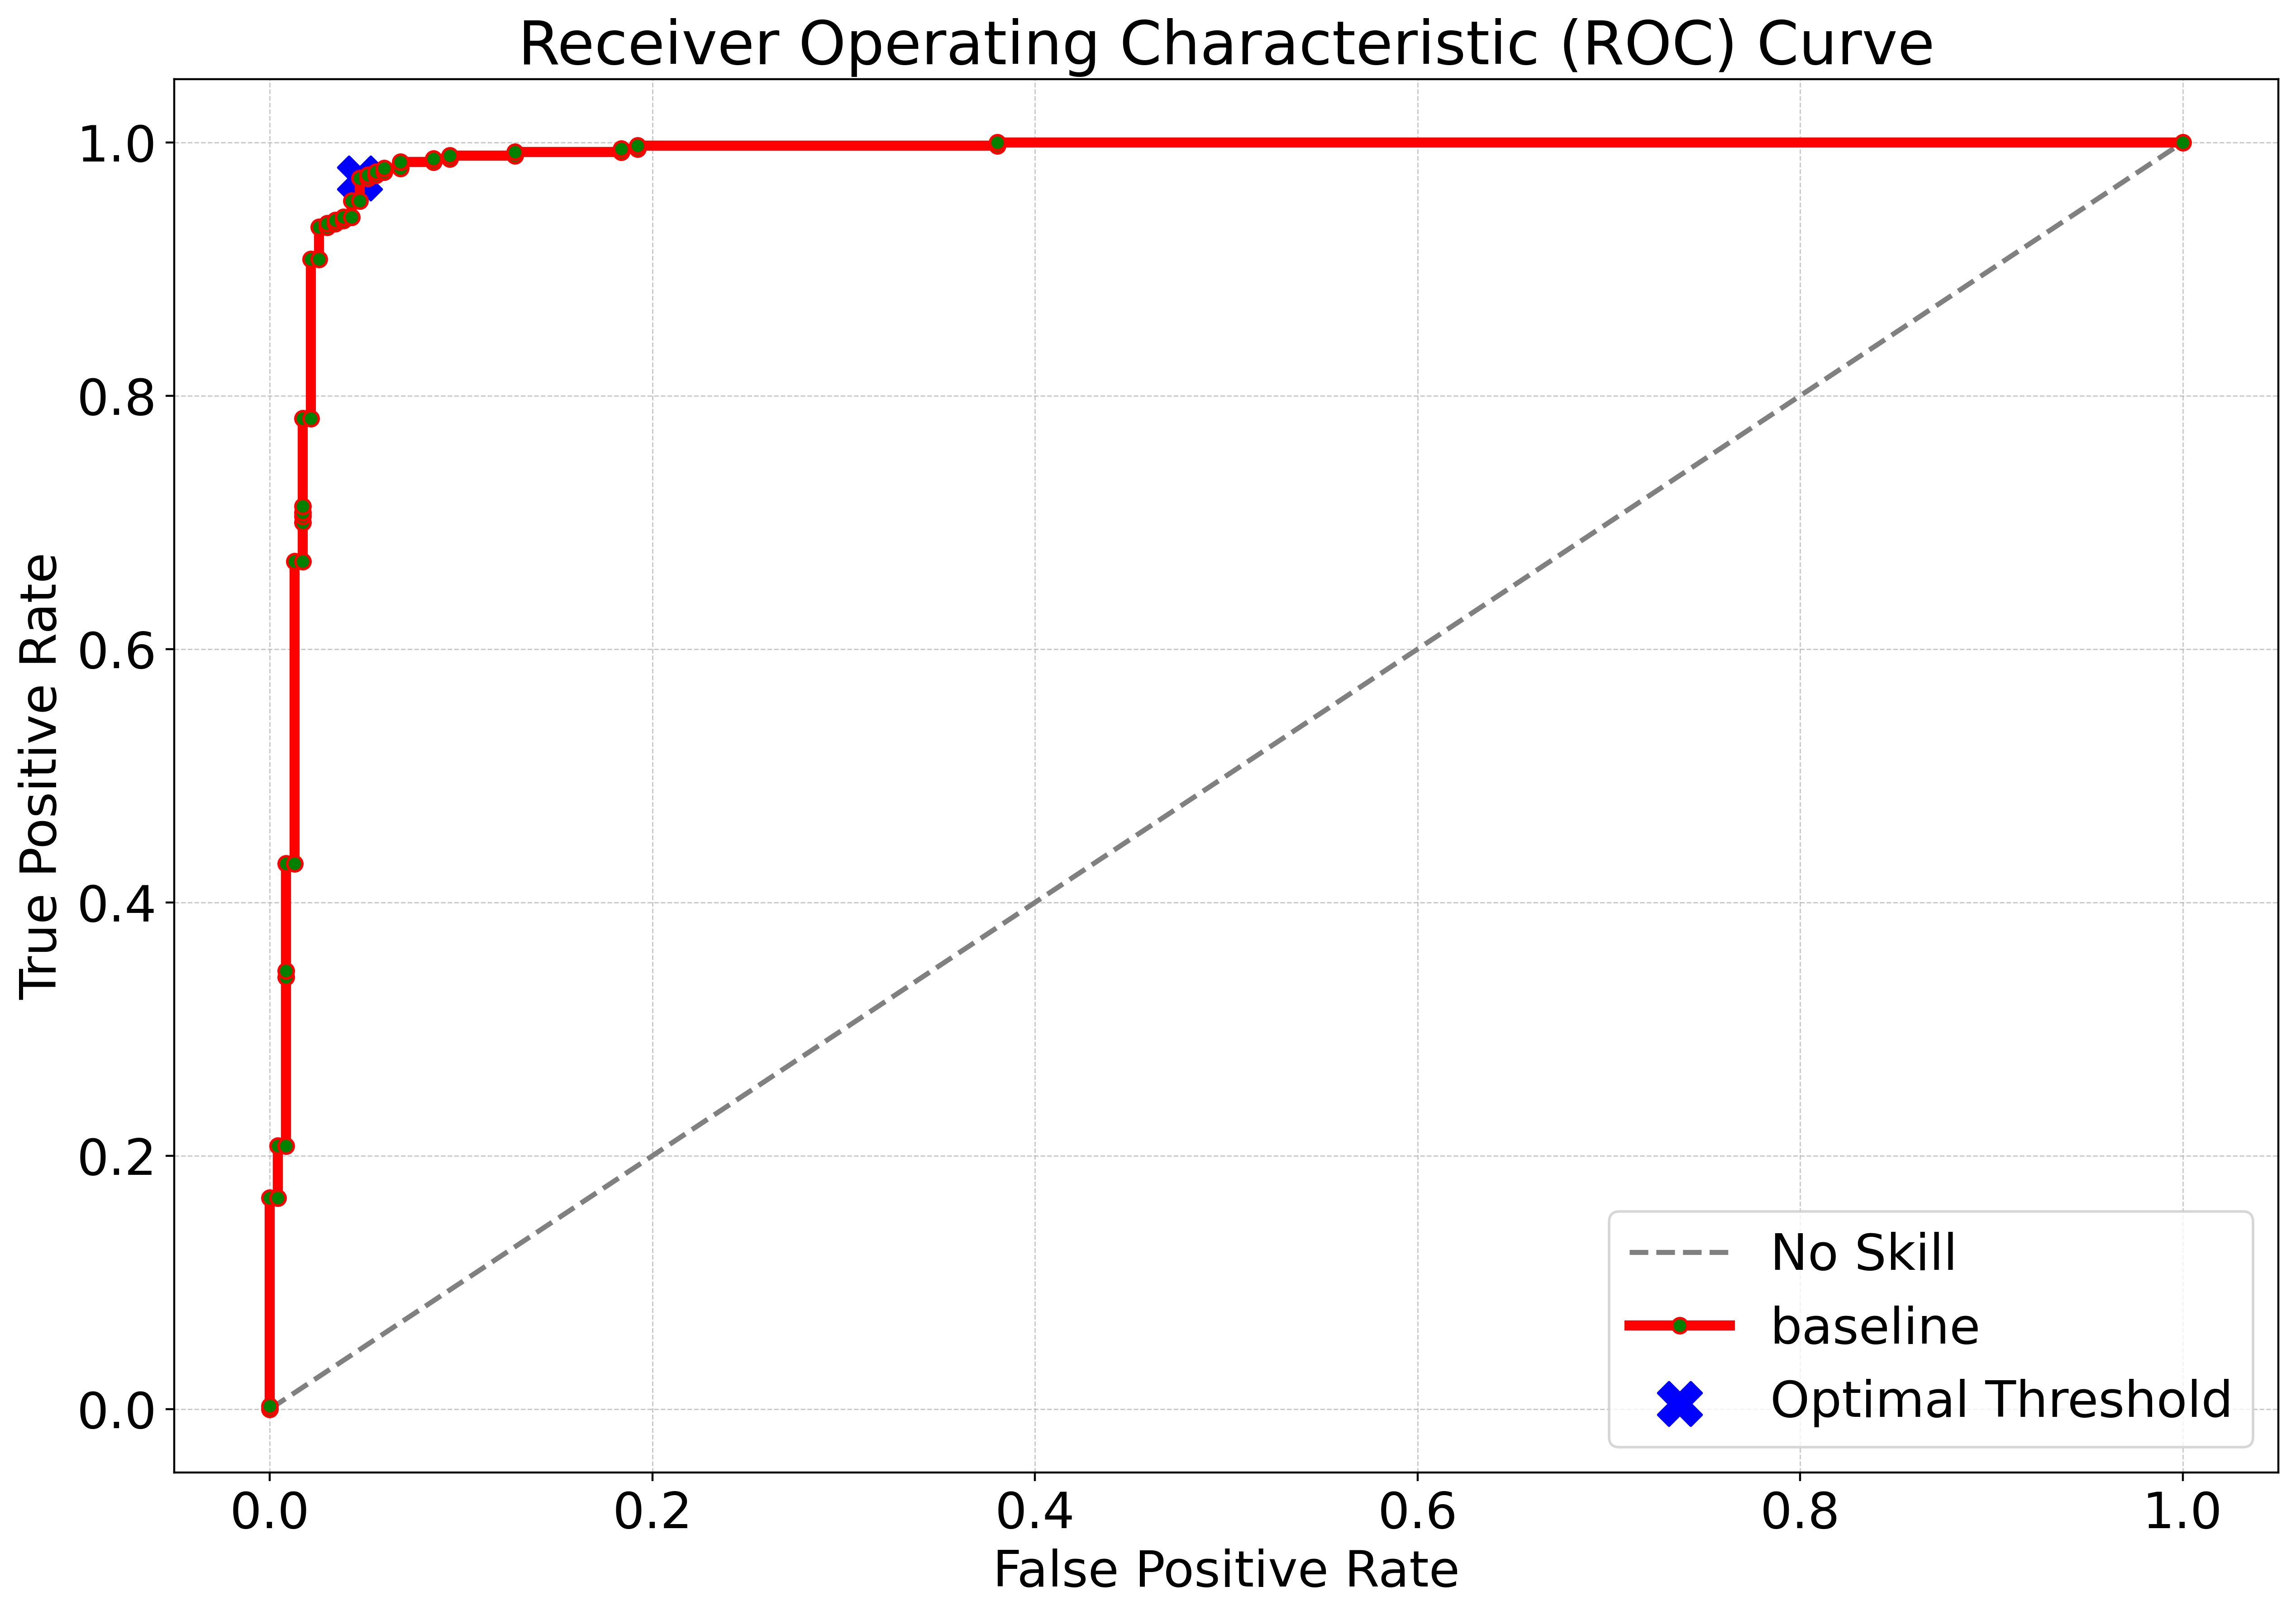

ROC AUC Score: 0.9844291036598729


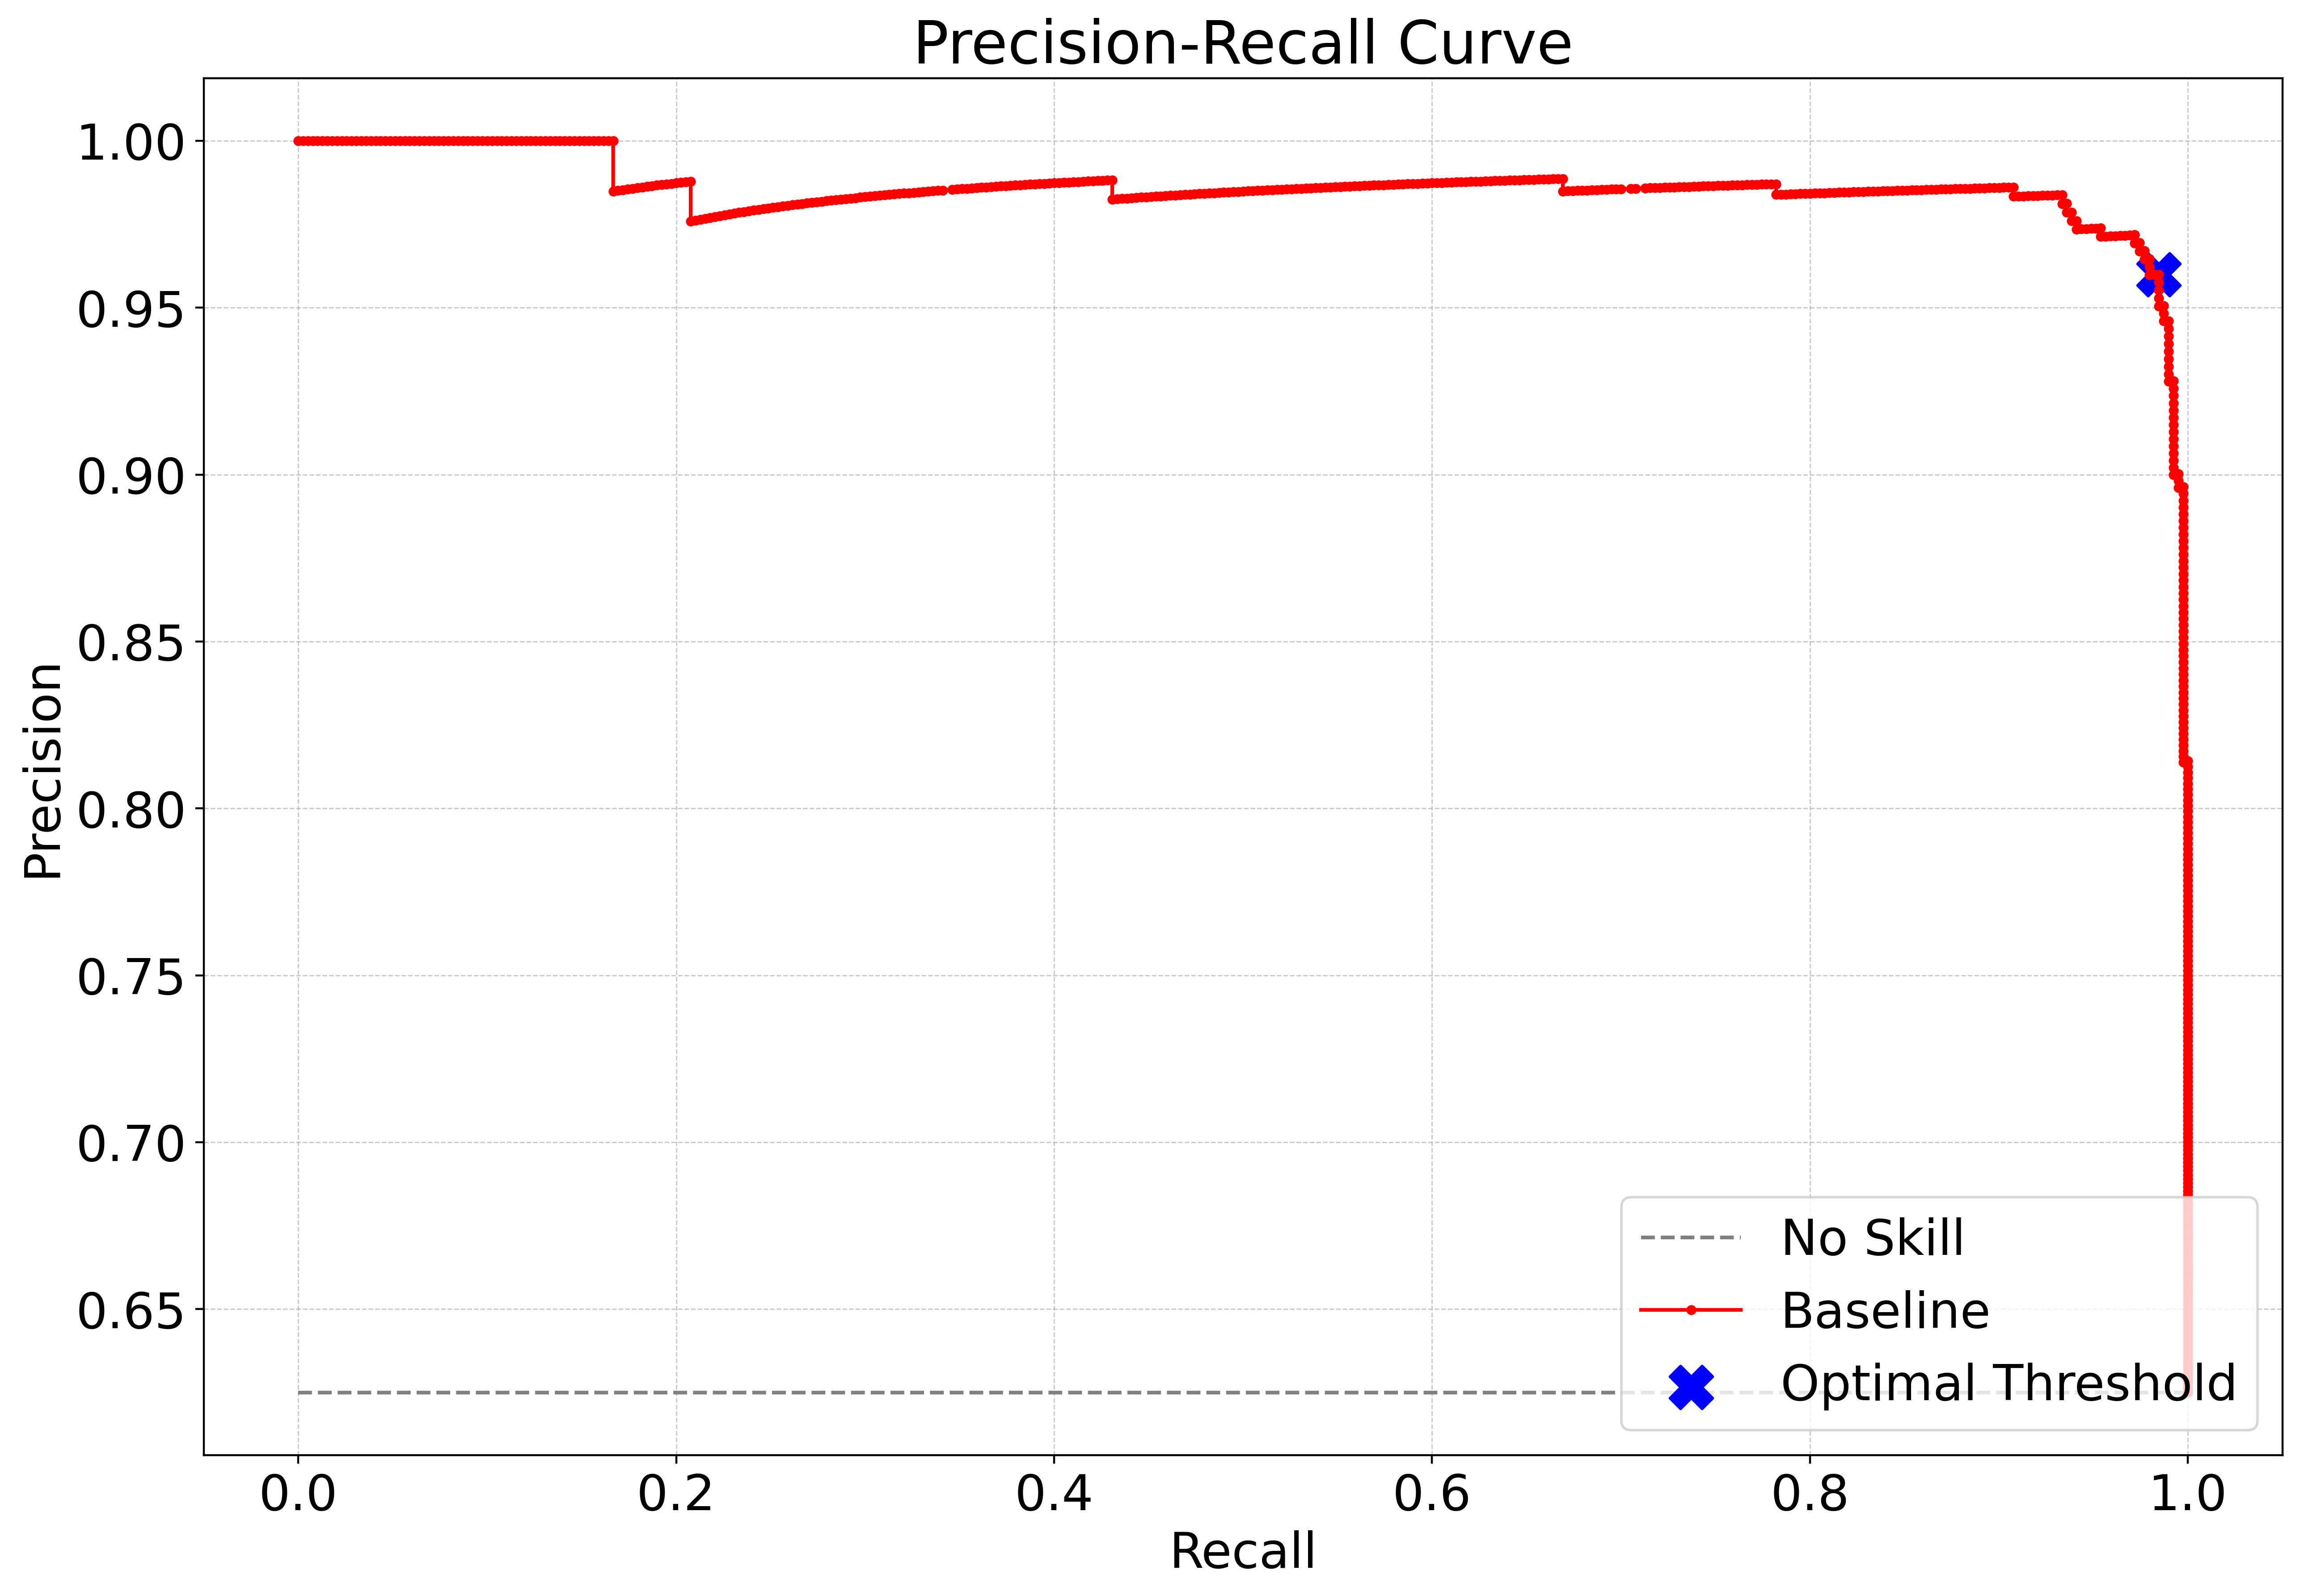

PR AUC Score: 0.9856253572950681
Best F1 Score: 0.9721518987341772
Threshold with best f1: 0.6886858940124512


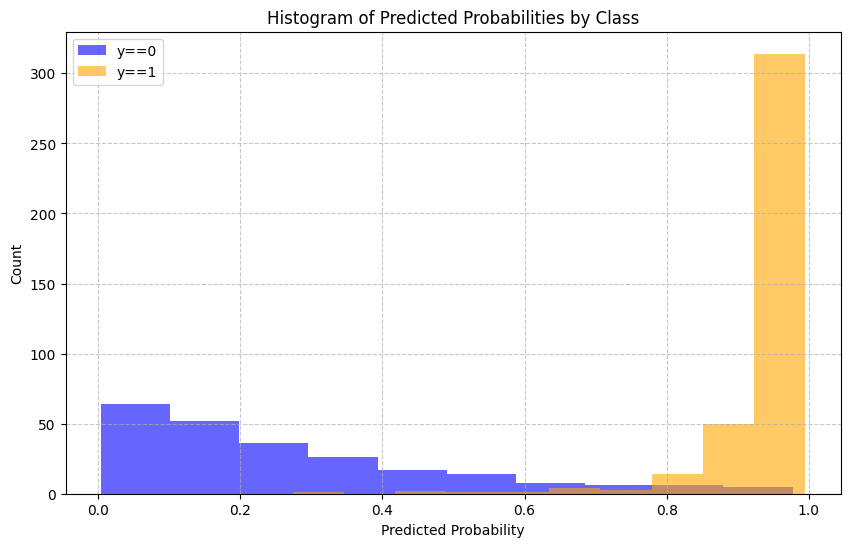

ECE: 0.08948673398566927
MCE: 0.4726284106572469


In [10]:
roc_auc_score_baseline = plot_roc_curve(true_labels, confidence_baseline[:, 1], "baseline")
print(f"ROC AUC Score: {roc_auc_score_baseline}")
best_threshold_f1_baseline, best_f1_baseline, pr_auc_baseline = plot_pr_curve(true_labels, confidence_baseline[:, 1], "Baseline")
print(f"PR AUC Score: {pr_auc_baseline}")
print(f"Best F1 Score: {best_f1_baseline}")
print(f"Threshold with best f1: {best_threshold_f1_baseline}")
ece_baseline, mce_baseline = plot_probability_histogram(true_labels, confidence_baseline[:, 1])
print(f"ECE: {ece_baseline}")
print(f"MCE: {mce_baseline}")

## Platt Scaling

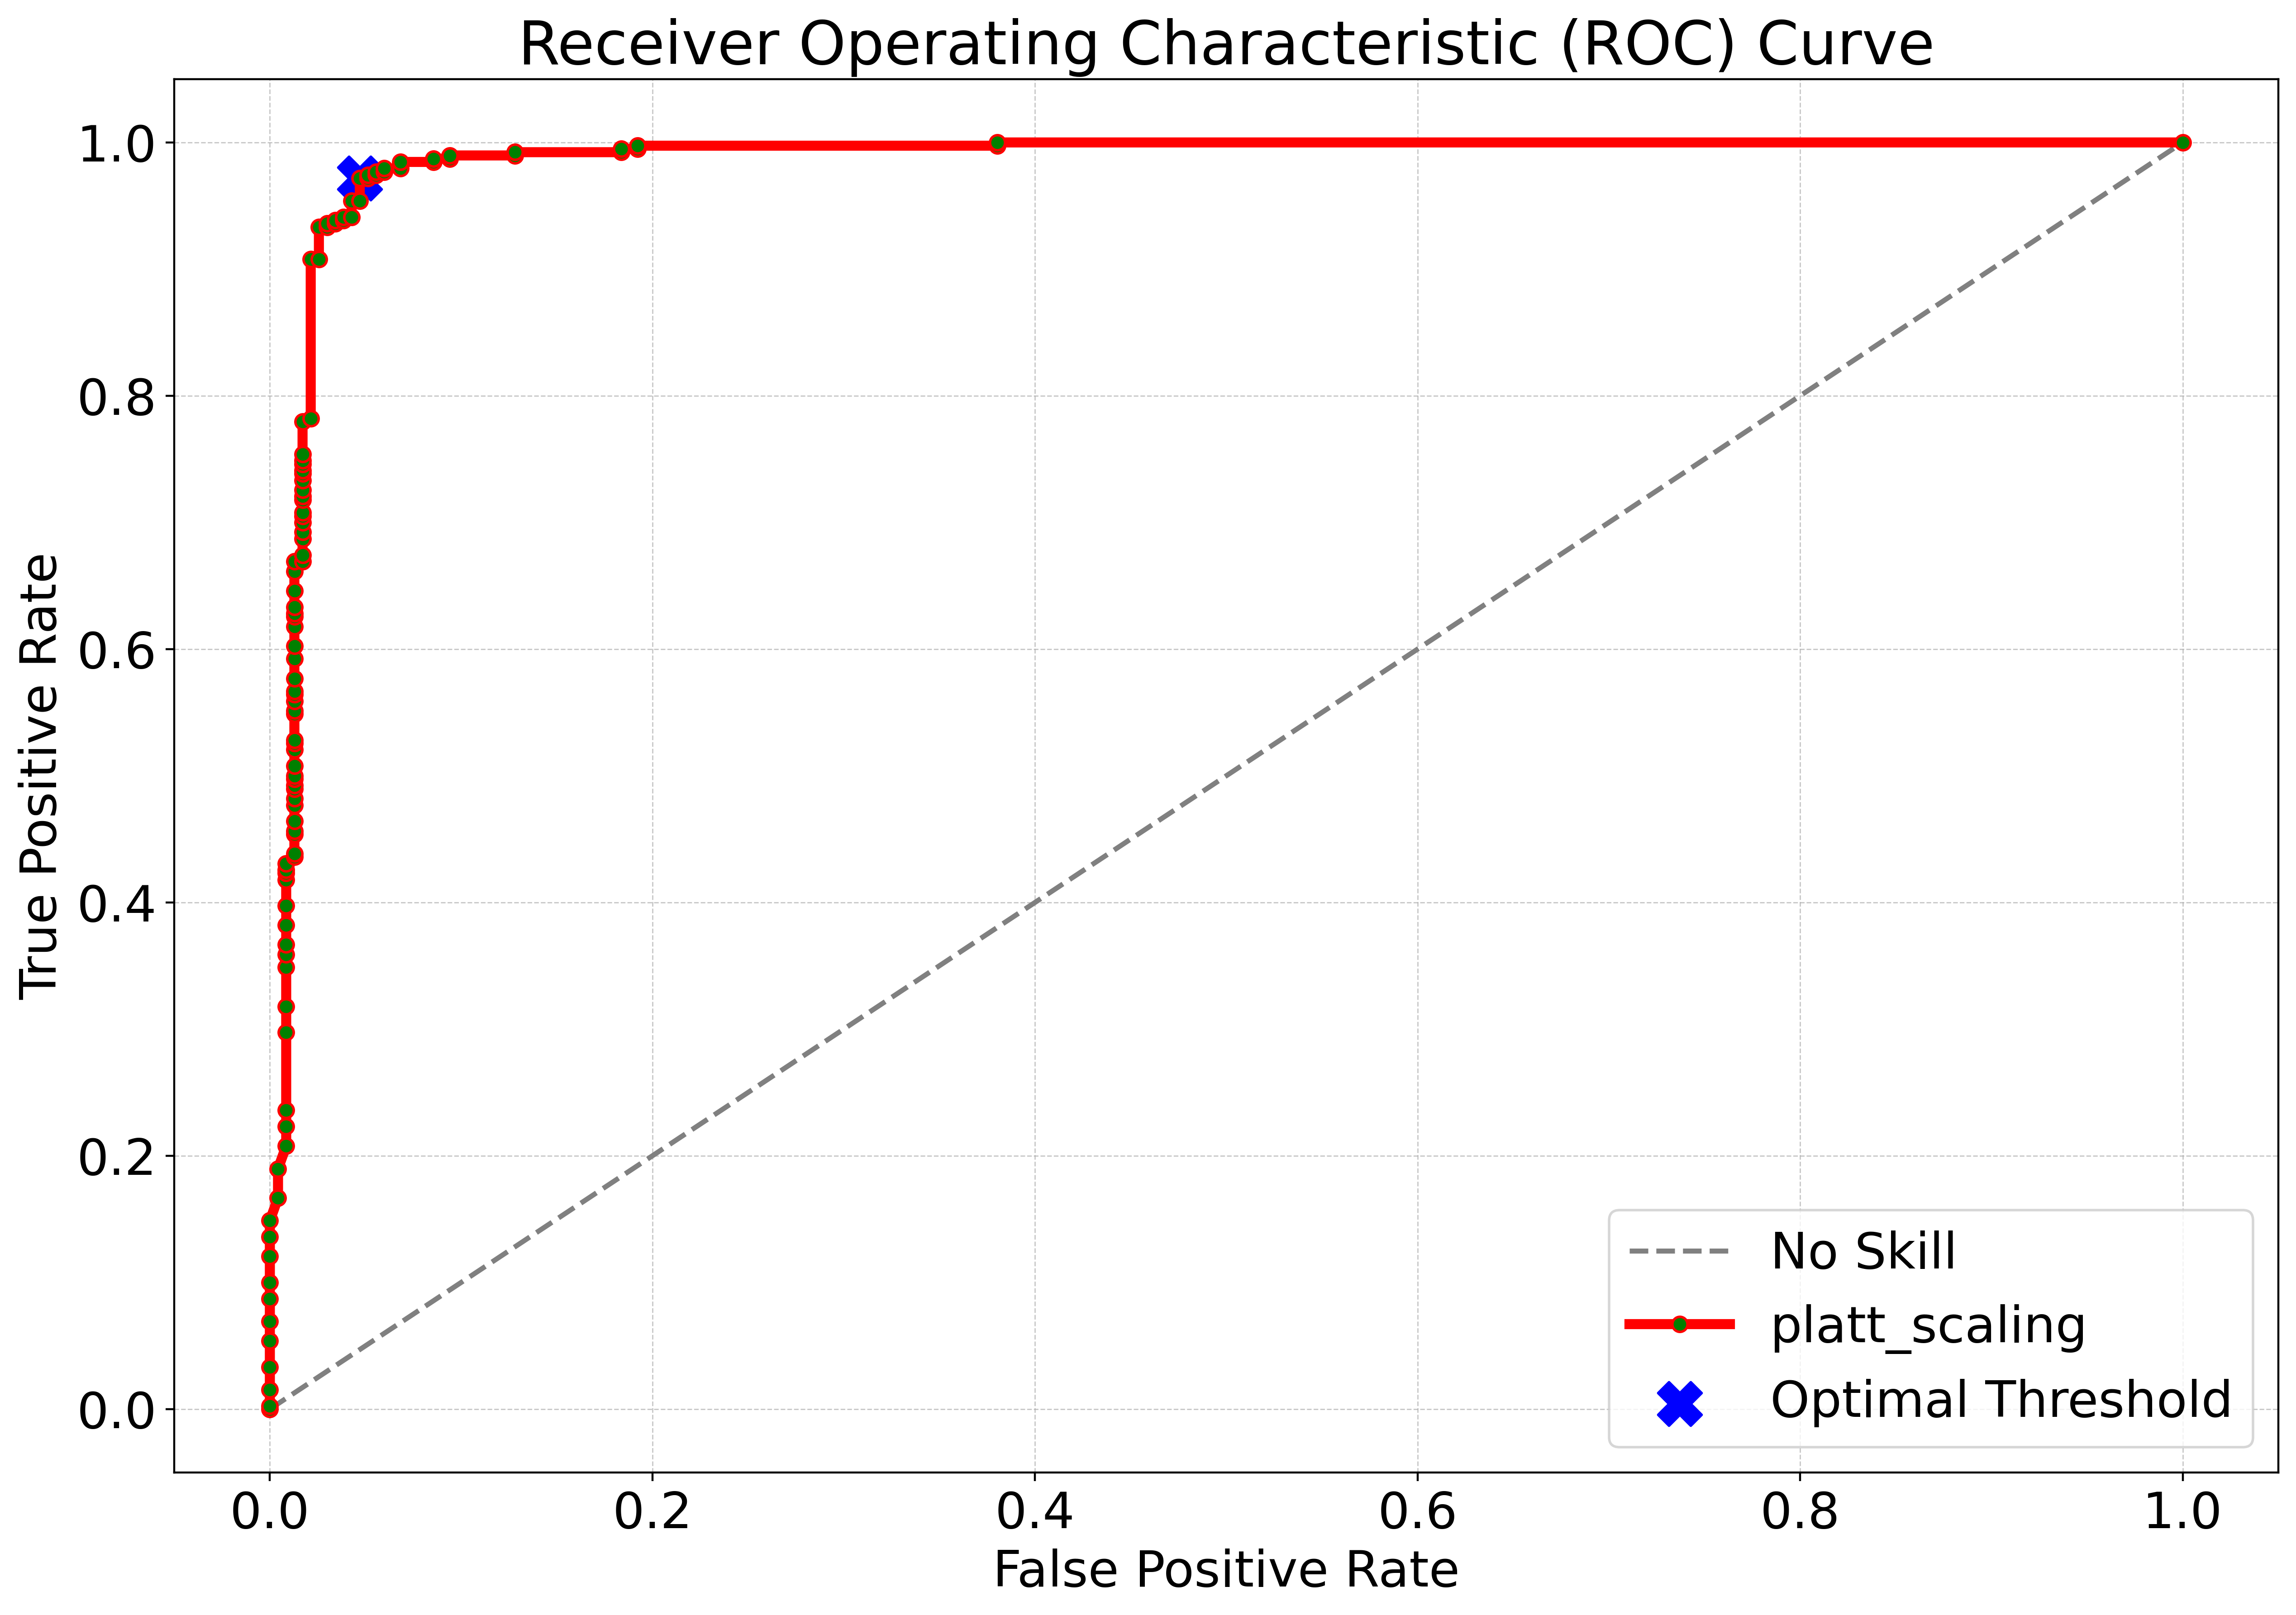

ROC AUC Score: 0.9843578785886478


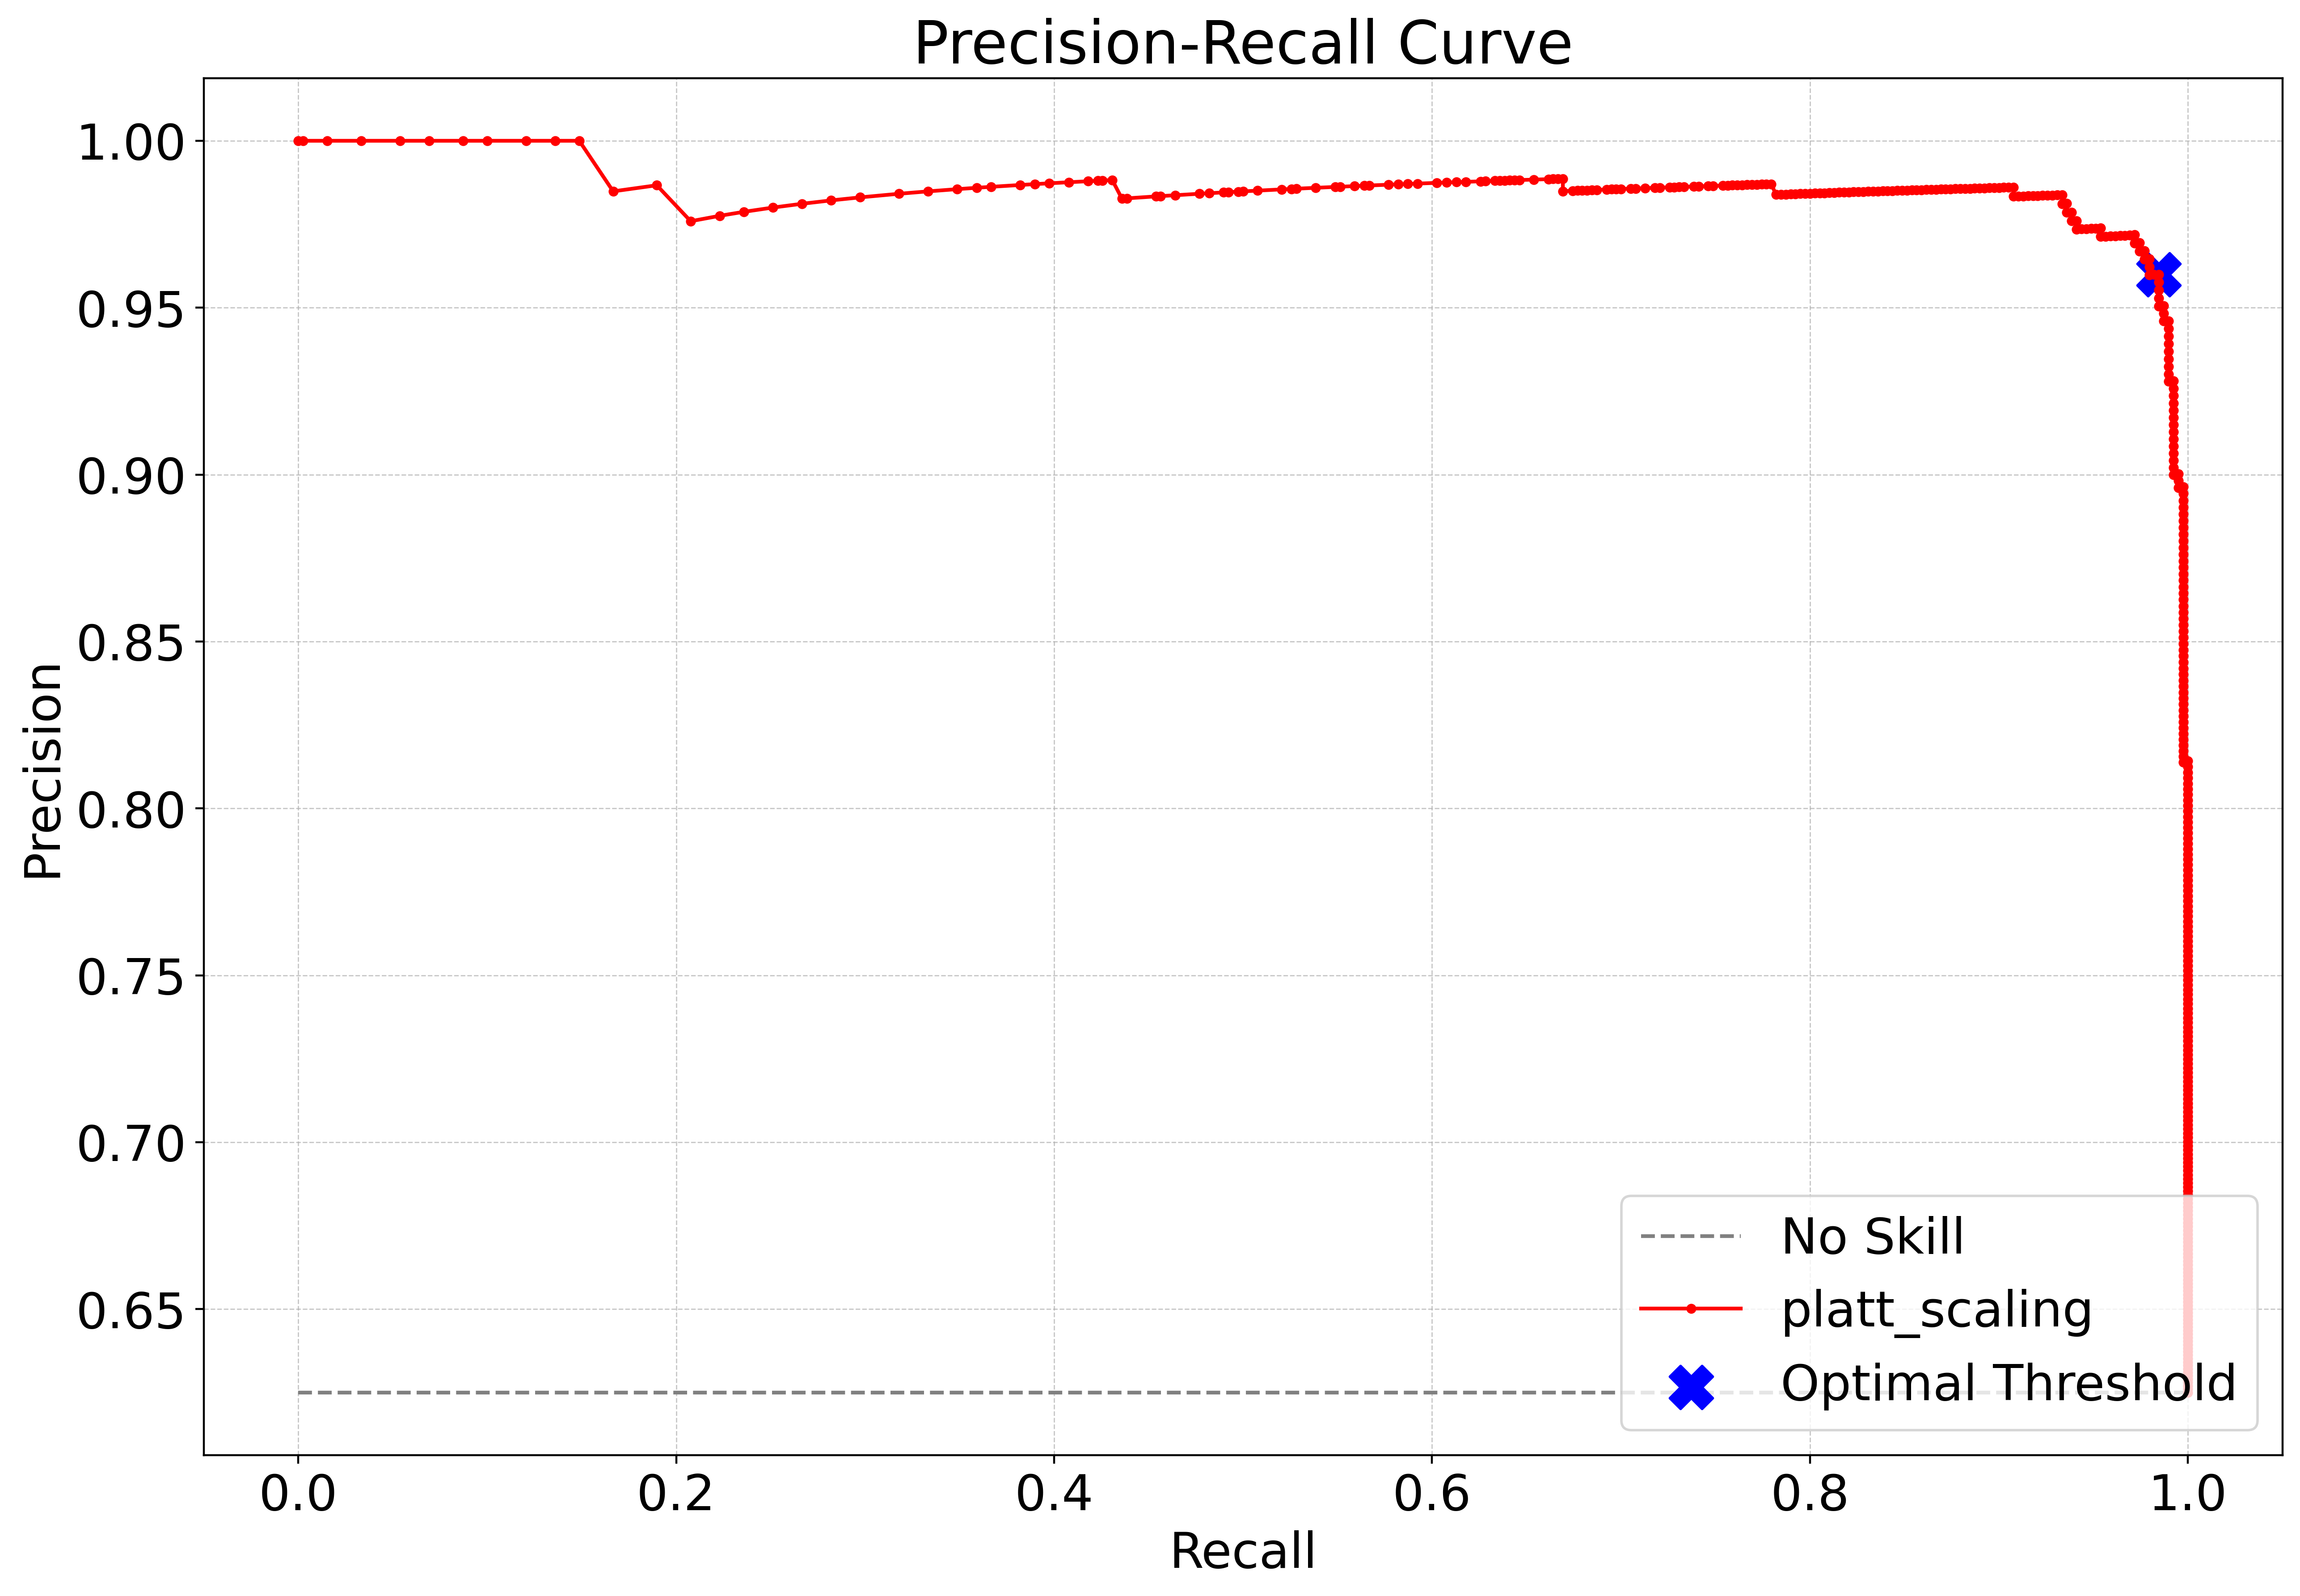

PR AUC Score: 0.9853904331020048
Best F1 Score: 0.9721518987341772
Threshold with best f1: 0.9999998950981753


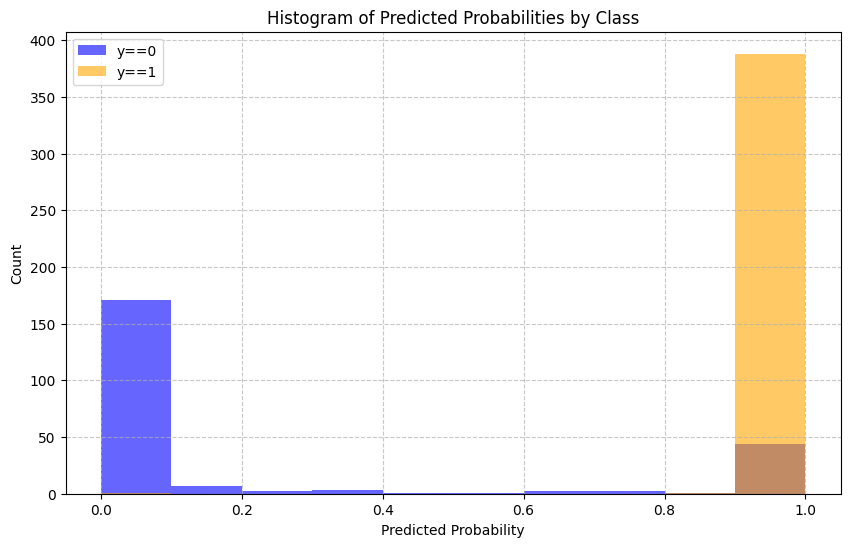

ECE: 0.082204716279465
MCE: 0.7208391139323914


In [11]:
model.optimize_platt_scaling(true_labels_val, confidence_all_classes_val[:, 1])
predicted_labels_platt_scaling, confidence_platt_scaling = model.evaluate_with_platt_scaling(confidence_baseline[:, 1])

roc_auc_score_platt_scaling = plot_roc_curve(true_labels, confidence_platt_scaling[:, 1], "platt_scaling")
print(f"ROC AUC Score: {roc_auc_score_platt_scaling}")
best_threshold_f1_platt_scaling, best_f1_platt_scaling, pr_auc_platt_scaling = plot_pr_curve(true_labels, confidence_platt_scaling[:, 1], "platt_scaling")
print(f"PR AUC Score: {pr_auc_platt_scaling}")
print(f"Best F1 Score: {best_f1_platt_scaling}")
print(f"Threshold with best f1: {best_threshold_f1_platt_scaling}")
ece_platt_scaling, mce_platt_scaling = plot_probability_histogram(true_labels, confidence_platt_scaling[:, 1])
print(f"ECE: {ece_platt_scaling}")
print(f"MCE: {mce_platt_scaling}")

## Beta-Calibration

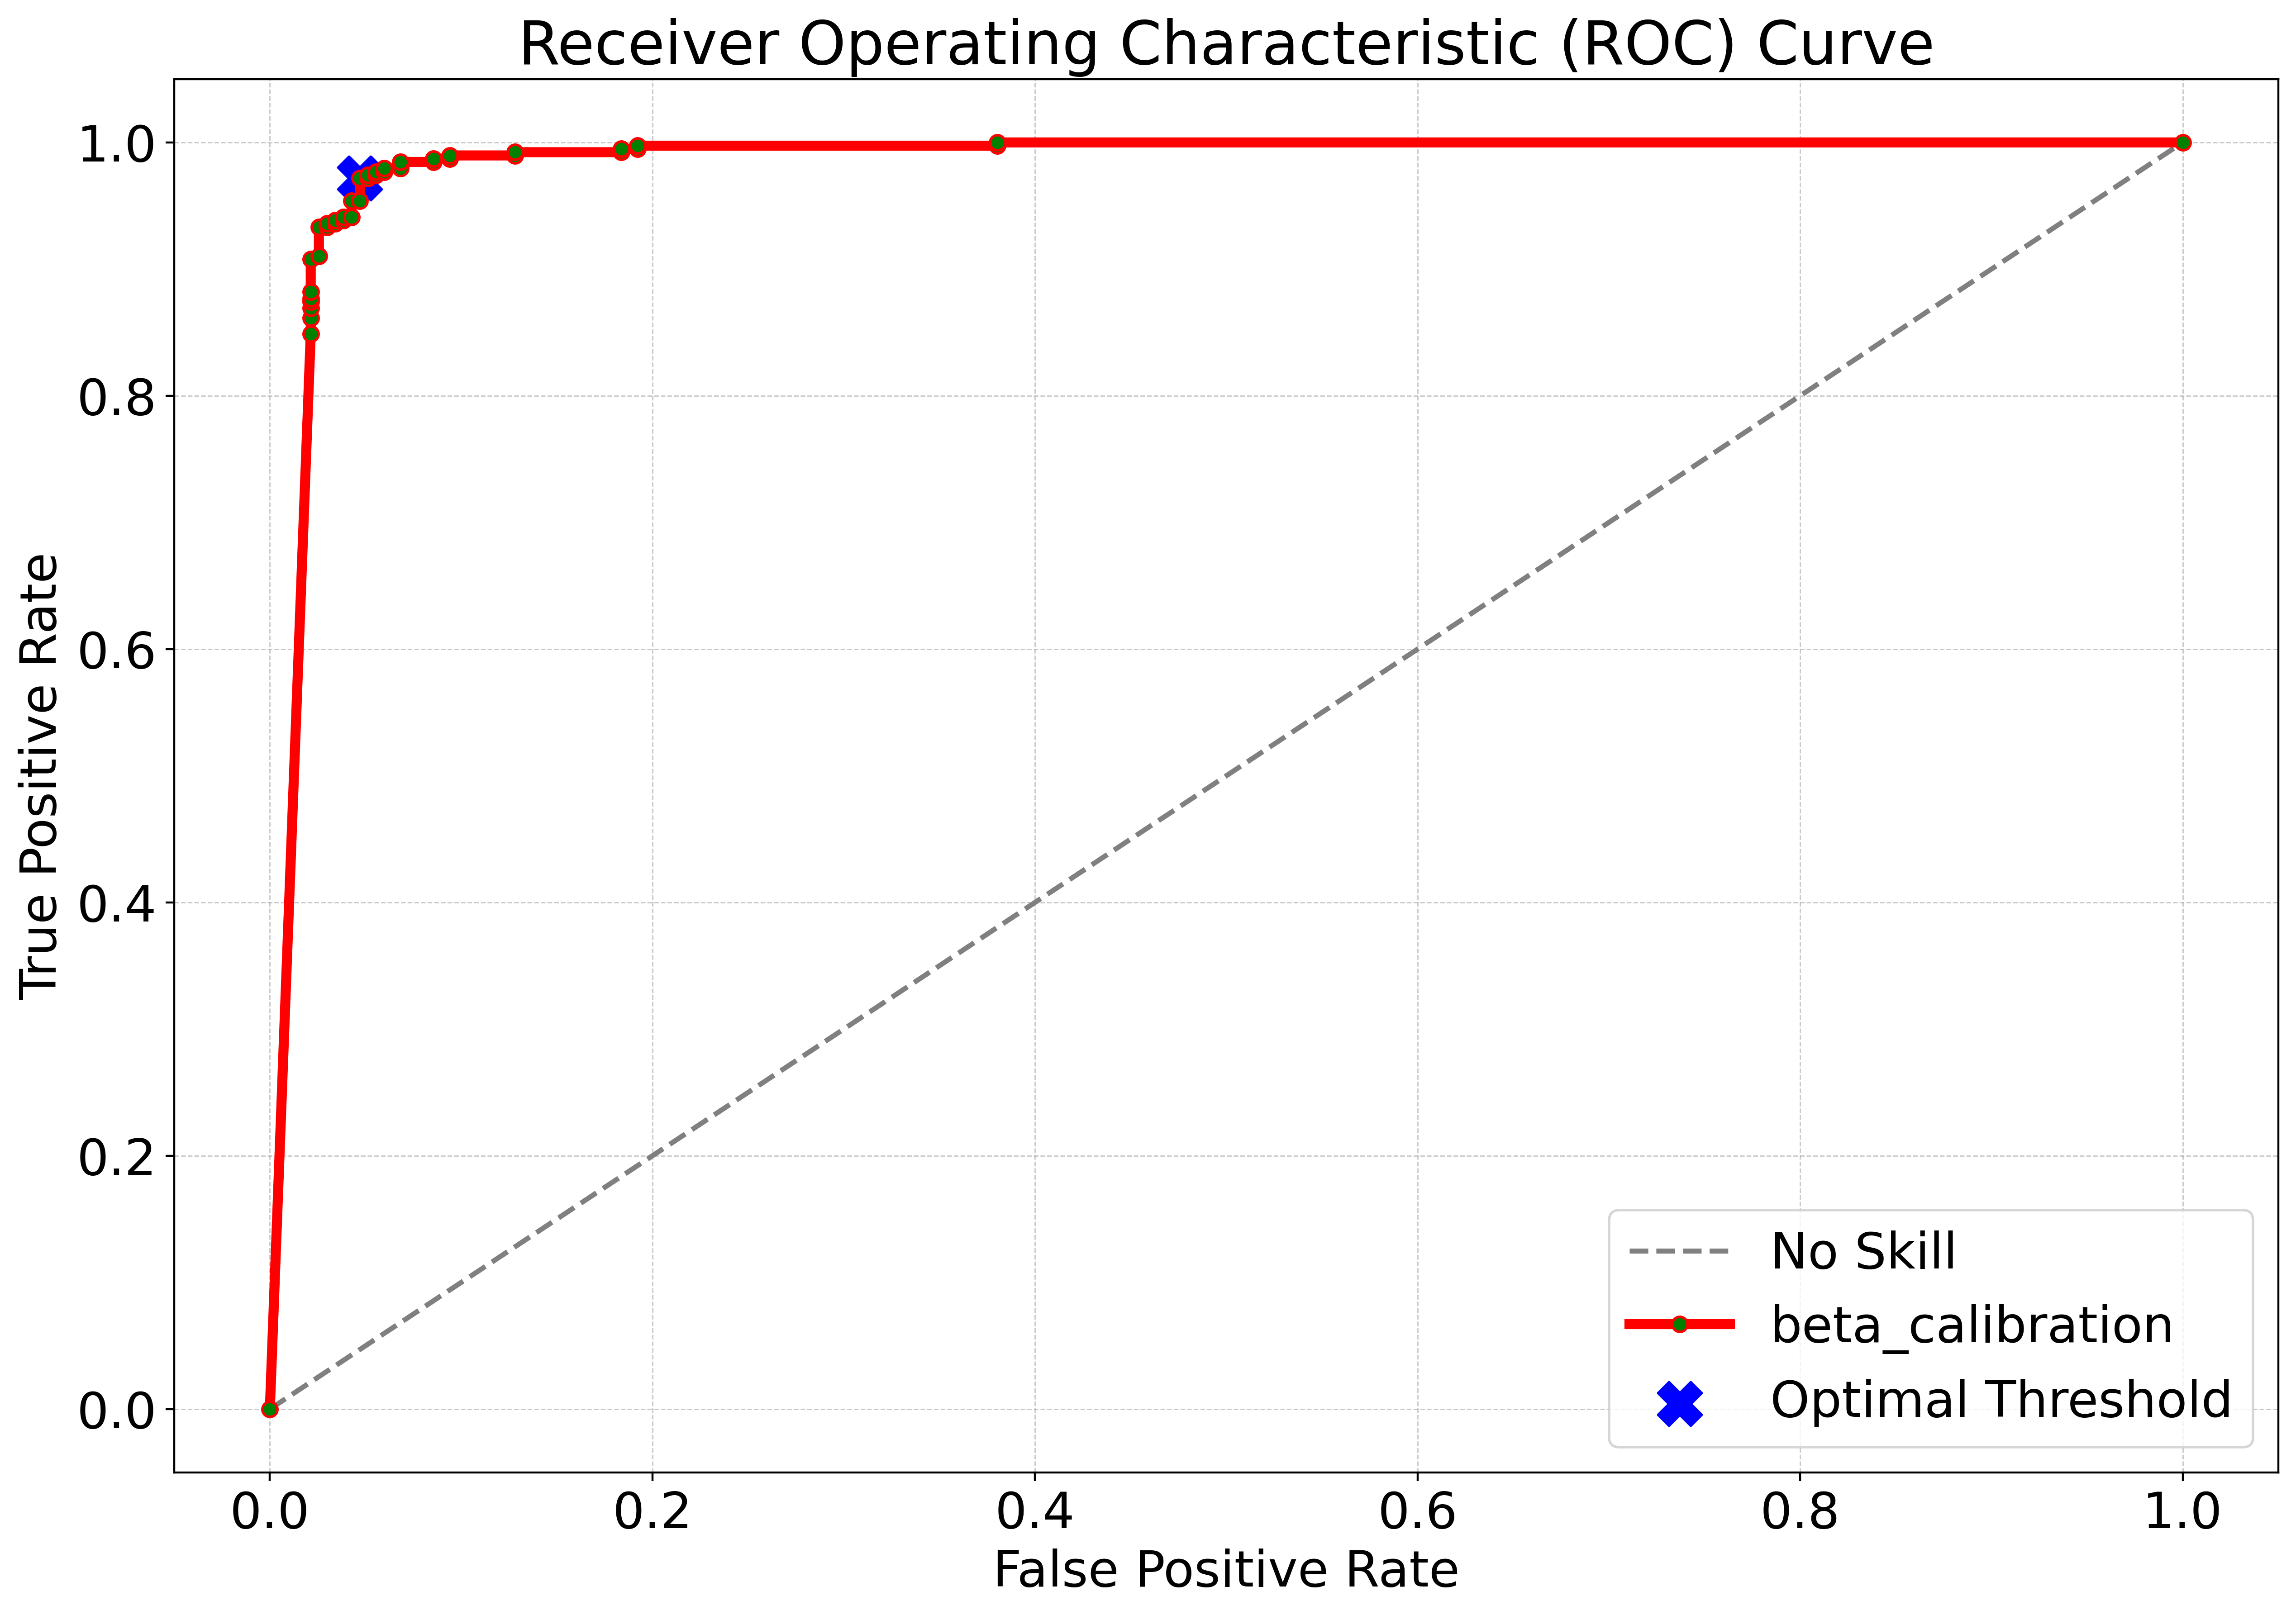

ROC AUC Score: 0.9838593030900724


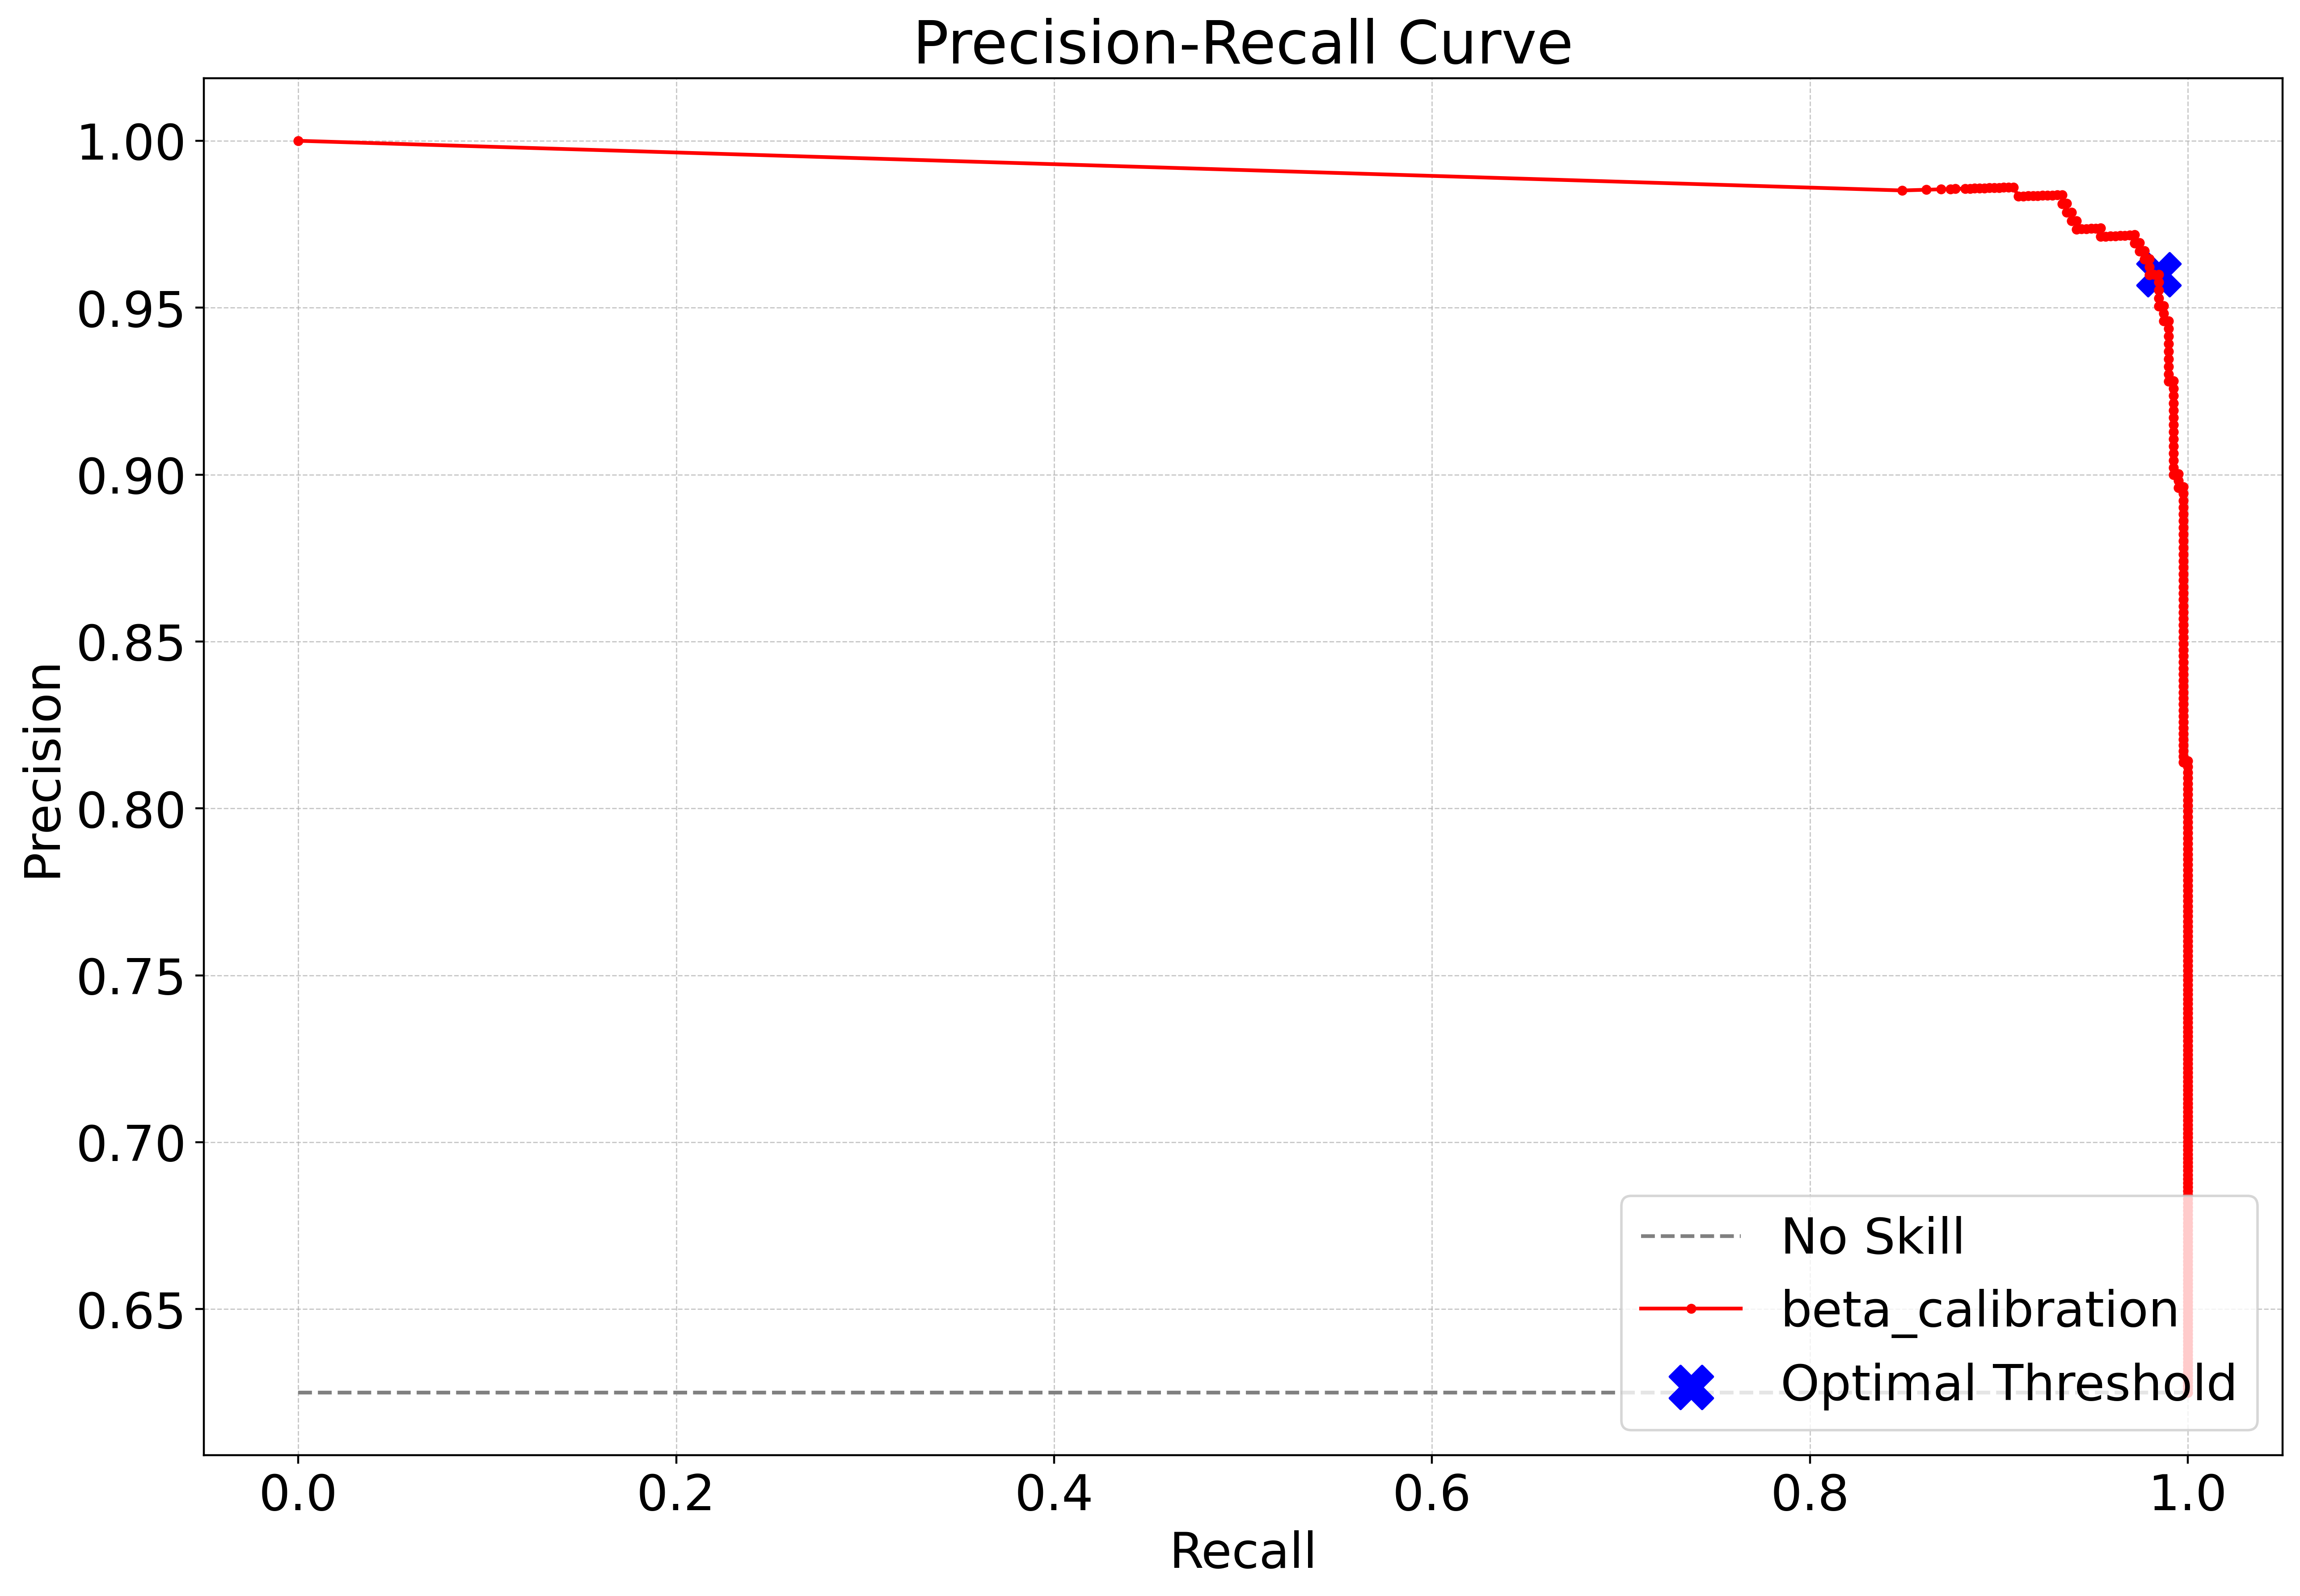

PR AUC Score: 0.9894960719533926
Best F1 Score: 0.9721518987341772
Threshold with best f1: 0.9999999016080839


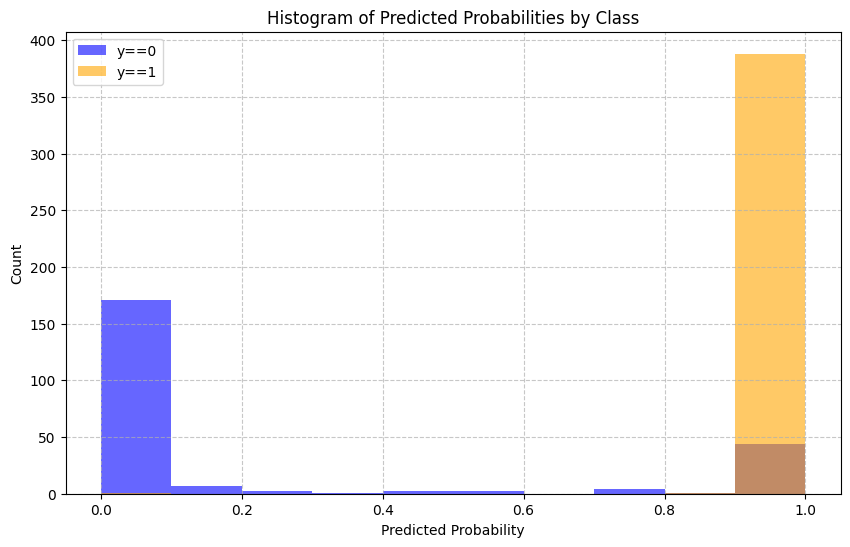

TypeError: Axis must be specified when shapes of a and weights differ.

In [12]:
model.optimize_beta_calibration(true_labels_val, confidence_all_classes_val[:, 1])
predicted_labels_beta_calibration, confidence_beta_calibration = model.evaluate_with_beta_calibration(confidence_baseline[:, 1])

roc_auc_score_beta_calibration = plot_roc_curve(true_labels, confidence_beta_calibration[:, 1], "beta_calibration")
print(f"ROC AUC Score: {roc_auc_score_beta_calibration}")
best_threshold_f1_beta_calibration, best_f1_beta_calibration, pr_auc_beta_calibration = plot_pr_curve(true_labels, confidence_beta_calibration[:, 1], "beta_calibration")
print(f"PR AUC Score: {pr_auc_beta_calibration}")
print(f"Best F1 Score: {best_f1_beta_calibration}")
print(f"Threshold with best f1: {best_threshold_f1_beta_calibration}")
ece_beta_calibration, mce_beta_calibration = plot_probability_histogram(true_labels, confidence_beta_calibration[:, 1])
print(f"ECE: {ece_beta_calibration}")
print(f"MCE: {mce_beta_calibration}")

In [8]:
model.optimize_platt_scaling(true_labels_val, confidence_all_classes_val[:, 1])
model.optimize_beta_calibration(true_labels_val, confidence_all_classes_val[:, 1])
model.optimize_spline_calibration(true_labels_val, confidence_all_classes_val[:, 1])

In [9]:
predicted_labels_platt_scaling, confidence_platt_scaling = model.evaluate_with_platt_scaling(confidence_baseline[:, 1])
predicted_labels_beta_calibration, confidence_beta_calibration = model.evaluate_with_beta_calibration(
    confidence_baseline[:,1])

predicted_labels_spline_calibration, confidence_spline_calibration = model.evaluate_with_spline_calibration(
    confidence_baseline[:,1])